In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# word cloud
from nltk import FreqDist
from wordcloud import WordCloud

In [2]:
opiates = pd.read_csv('SubredditDatasets/opiates_cleaned.csv')
recovery = pd.read_csv('SubredditDatasets/recovery_cleaned.csv')

# Summary of Data

## Opiates

In [3]:
print('There is a total of', opiates.shape[0], 'posts.')

average = sum(opiates['post_length'])/len(opiates['post_length'])
print('There is an average of', int(average), 'words per cleaned post.')

print('There are', len(opiates['name'].unique()), 'unique users.')

num_posts_per_user = opiates.groupby('name').size()
print("Minimum Number of Posts Per User:", min(num_posts_per_user))
print("Average Number of Posts Per User:", int(sum(num_posts_per_user)/len(num_posts_per_user)))
print("Maximum Number of Posts Per User:", max(num_posts_per_user))

There is a total of 31736 posts.
There is an average of 60 words per cleaned post.
There are 13024 unique users.
Minimum Number of Posts Per User: 1
Average Number of Posts Per User: 2
Maximum Number of Posts Per User: 193


## Recovery

In [4]:
print('There is a total of', recovery.shape[0], 'posts.')

average = sum(recovery['post_length'])/len(recovery['post_length'])
print('There is an average of', int(average), 'words per cleaned post.')

print('There are', len(recovery['name'].unique()), 'unique users.')

num_posts_per_user = recovery.groupby('name').size()
print("Minimum Number of Posts Per User:", min(num_posts_per_user))
print("Average Number of Posts Per User:", int(sum(num_posts_per_user)/len(num_posts_per_user)))
print("Maximum Number of Posts Per User:", max(num_posts_per_user))

There is a total of 10188 posts.
There is an average of 85 words per cleaned post.
There are 4568 unique users.
Minimum Number of Posts Per User: 1
Average Number of Posts Per User: 2
Maximum Number of Posts Per User: 302


# Common Words

In [5]:
def color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = 0 # 0 - 360
    s = 0 # 0 - 100
    l = random_state.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

def create_freq_df(col):
    all_words = " ".join(col)
    tokens = all_words.split()
    freq = FreqDist(list(tokens)).most_common(50)
    return freq, pd.DataFrame(freq, columns=['words', 'freq'])

def create_word_cloud(freq, color):
    wordcloud = WordCloud(width=800, 
                          height=800, 
                          background_color=color, 
                          color_func=color_func).generate_from_frequencies(dict(freq))
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Most Common Words in Opiates Posts')
    plt.axis('off')
    plt.show()

In [6]:
opiates_freq, opiates_common_words = create_freq_df(opiates['cleaned_text'])
recovery_freq, recovery_common_words = create_freq_df(recovery['cleaned_text'])

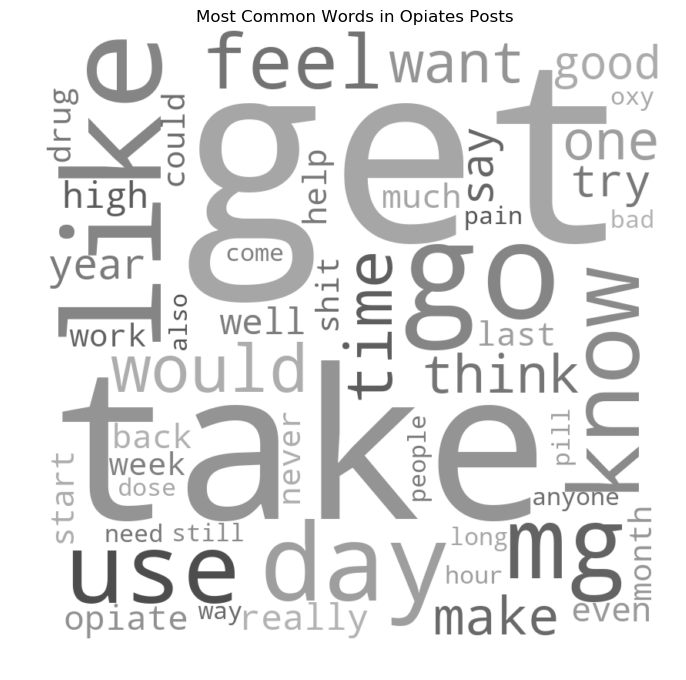

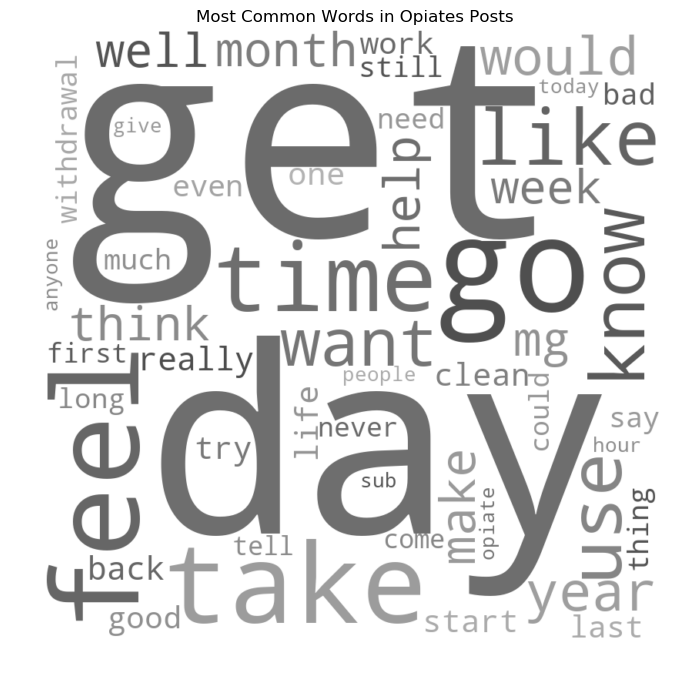

In [7]:
create_word_cloud(opiates_freq, 'white')
create_word_cloud(recovery_freq, 'white')

In [8]:
# words that appear in opiates top 50, but not recovery top 50
opiates_list = list(opiates_common_words['words'])
recovery_list = list(recovery_common_words['words'])
print('words in opiates and not in recovery:', np.setdiff1d(opiates_list, recovery_list))
print('words in recovery and not in opiates:', np.setdiff1d(recovery_list, opiates_list))

words in opiates and not in recovery: ['also' 'dose' 'drug' 'high' 'oxy' 'pain' 'pill' 'shit' 'way']
words in recovery and not in opiates: ['clean' 'first' 'give' 'life' 'sub' 'tell' 'thing' 'today' 'withdrawal']


In [15]:
opiates_freq_df = pd.DataFrame(opiates_freq)
opiates_freq_df.columns = [["word", "count"]]
opiates_freq_df.to_csv("opiates_freq.csv", index=False)

In [16]:
recovery_freq_df = pd.DataFrame(recovery_freq)
recovery_freq_df.columns = [["word", "count"]]
recovery_freq_df.to_csv("recovery_freq.csv", index=False)